<a href="https://colab.research.google.com/github/the-confused-genius/pantheon/blob/main/pantheon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libraries to use and perform on the funcitons

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import re
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from collections import OrderedDict
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix

Importing the dataset from my github repository 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/the-confused-genius/pantheon/main/diabetes_data_upload.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


Checking the information of the dataframe and the datatype of each column

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

Checking for null values in the dataframe

In [4]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

Gender	
Polyuria	
Polydipsia	
sudden weight loss
weakness	
Polyphagia       
Genital thrush	
visual blurring	
Itching	
Irritability	
delayed healing	
partial paresis	
muscle stiffness	
Alopecia	
Obesity	
class - target variable 

All the above mentioned columns are in the form of string (objects) and needs to be converted to integer for faster and better machine learning model.

Data processing


In [5]:
print(df['Gender'].value_counts()) 
print("\n")
print(df['Polyuria'].value_counts()) 
print("\n")
print(df['Polydipsia'].value_counts()) 
print("\n")
print(df['sudden weight loss'].value_counts()) 
print("\n")
print(df['weakness'].value_counts()) 
print("\n")
print(df['Polyphagia'].value_counts()) 
print("\n")
print(df['Genital thrush'].value_counts()) 
print("\n")
print(df['visual blurring'].value_counts()) 
print("\n")
print(df['Itching'].value_counts()) 
print("\n")
print(df['Irritability'].value_counts()) 
print("\n")
print(df['delayed healing'].value_counts()) 
print("\n")
print(df['partial paresis'].value_counts()) 
print("\n")
print(df['muscle stiffness'].value_counts()) 
print("\n")
print(df['Alopecia'].value_counts()) 
print("\n")
print(df['Obesity'].value_counts()) 
print("\n")
print(df['class'].value_counts()) 

Male      328
Female    192
Name: Gender, dtype: int64


No     262
Yes    258
Name: Polyuria, dtype: int64


No     287
Yes    233
Name: Polydipsia, dtype: int64


No     303
Yes    217
Name: sudden weight loss, dtype: int64


Yes    305
No     215
Name: weakness, dtype: int64


No     283
Yes    237
Name: Polyphagia, dtype: int64


No     404
Yes    116
Name: Genital thrush, dtype: int64


No     287
Yes    233
Name: visual blurring, dtype: int64


No     267
Yes    253
Name: Itching, dtype: int64


No     394
Yes    126
Name: Irritability, dtype: int64


No     281
Yes    239
Name: delayed healing, dtype: int64


No     296
Yes    224
Name: partial paresis, dtype: int64


No     325
Yes    195
Name: muscle stiffness, dtype: int64


No     341
Yes    179
Name: Alopecia, dtype: int64


No     432
Yes     88
Name: Obesity, dtype: int64


Positive    320
Negative    200
Name: class, dtype: int64


In [6]:
df['Gender'] = df['Gender'].replace(to_replace = 'Male',value = 0)
df['Gender'] = df['Gender'].replace(to_replace = 'Female',value = 1)

df['Polyuria']  = df['Polyuria'].replace(to_replace = 'No',value = 0)
df['Polyuria']  = df['Polyuria'].replace(to_replace = 'Yes',value = 1)

df['Polydipsia']  = df['Polydipsia'].replace(to_replace = 'No',value = 0)
df['Polydipsia']  = df['Polydipsia'].replace(to_replace = 'Yes',value = 1)

df['sudden weight loss'] = df['sudden weight loss'].replace(to_replace = 'No',value = 0)
df['sudden weight loss'] = df['sudden weight loss'].replace(to_replace = 'Yes',value = 1)

df['weakness'] = df['weakness'].replace(to_replace = 'No',value = 0)
df['weakness'] = df['weakness'].replace(to_replace = 'Yes',value = 1)

df['Polyphagia'] = df['Polyphagia'].replace(to_replace = 'No',value = 0)
df['Polyphagia'] = df['Polyphagia'].replace(to_replace = 'Yes',value = 1)

df['Genital thrush']  = df['Genital thrush'].replace(to_replace = 'No',value = 0)
df['Genital thrush']  = df['Genital thrush'].replace(to_replace = 'Yes',value = 1)

df['visual blurring'] = df['visual blurring'].replace(to_replace = 'No',value = 0)
df['visual blurring'] = df['visual blurring'].replace(to_replace = 'Yes',value = 1)

df['Itching'] = df['Itching'].replace(to_replace = 'No',value = 0)
df['Itching'] = df['Itching'].replace(to_replace = 'Yes',value = 1)

df['Irritability'] = df['Irritability'].replace(to_replace = 'No',value = 0)
df['Irritability'] = df['Irritability'].replace(to_replace = 'Yes',value = 1)

df['delayed healing'] = df['delayed healing'].replace(to_replace = 'No',value = 0)
df['delayed healing'] = df['delayed healing'].replace(to_replace = 'Yes',value = 1)

df['partial paresis'] = df['partial paresis'].replace(to_replace = 'No',value = 0)
df['partial paresis'] = df['partial paresis'].replace(to_replace = 'Yes',value = 1)

df['muscle stiffness'] = df['muscle stiffness'].replace(to_replace = 'No',value = 0)
df['muscle stiffness'] = df['muscle stiffness'].replace(to_replace = 'Yes',value = 1)

df['Alopecia'] = df['Alopecia'].replace(to_replace = 'No',value = 0)
df['Alopecia'] = df['Alopecia'].replace(to_replace = 'Yes',value = 1)

df['Obesity'] = df['Obesity'].replace(to_replace = 'No',value = 0)
df['Obesity'] = df['Obesity'].replace(to_replace = 'Yes',value = 1)

df['class'] = df['class'].replace(to_replace = 'Negative',value = 0)
df['class'] = df['class'].replace(to_replace = 'Positive',value = 1)

The columns of the dataframe is now in the form of integer 

In [7]:
df.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,55,0,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,57,0,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,66,0,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,67,0,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,70,0,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


The following is the histogram of diabetes in different age groups

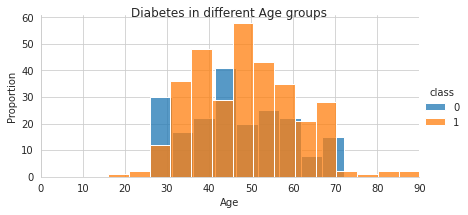

In [8]:
def plotHistogram(values,label,feature,title):
    sns.set_style("whitegrid")
    plotOne = sns.FacetGrid(values, hue=label,aspect=2)
    plotOne.map(sns.histplot,feature,kde=False)
    plotOne.set(xlim=(0, values[feature].max()))
    plotOne.add_legend()
    plotOne.set_axis_labels(feature, 'Proportion')
    plotOne.fig.suptitle(title)
    plt.show()
plotHistogram(df,'class','Age','Diabetes in different Age groups')

The following is the correlation graph

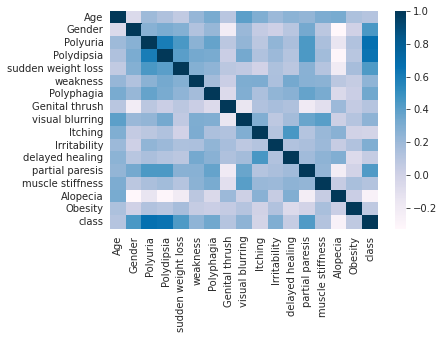

In [9]:
g = sns.heatmap(df.corr(),cmap="PuBu",annot=False) 

Separating the independent and the target variables

In [10]:
x = df[['Age',	'Gender',	'Polyuria',	'Polydipsia',	'sudden weight loss',	'weakness',	'Polyphagia',	'Genital thrush',	'visual blurring',	'Itching',	'Irritability',	'delayed healing',	'partial paresis',	'muscle stiffness',	'Alopecia',	'Obesity']]
y = df['class']

Splitting the dataframe into two parts (training and testing), training and testing are in the ratio of 80 : 20, and mixing the dataframe into randome train and test subsets

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=40)
print(x_train.shape)
print(x_test.shape)

(416, 16)
(104, 16)


MLP which is Multi-layer Perceptron classifier, is a type of neural network, which can be used to train a machine learning model and it is used to classify or predict the target variable

In [12]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(x_train,y_train)

predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Outputing the accuracy of the model

In [13]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[40  4]
 [ 6 54]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        44
           1       0.93      0.90      0.92        60

    accuracy                           0.90       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.91      0.90      0.90       104



In [14]:
d = classification_report(y_test, predict_test,target_names=None,output_dict=True)
print("The accuracy of the model is " + str(d['accuracy']*100))

The accuracy of the model is 90.38461538461539


Taking input from the user, to predict if the patient has diabetes or not

In [15]:
#@title Enter the details of the patient
Age =  58#@param {type:"number"}
Male = 0
Female = 1
No = 0
Yes = 1
Gender = Male #@param ["Male", "Female"] {type:"raw"}
Polyuria = Yes #@param ["Yes", "No"] {type:"raw"}
Polydipsia = Yes #@param ["Yes", "No"] {type:"raw"}
sudden_weight_loss = Yes #@param ["Yes", "No"] {type:"raw"}
weakness = Yes #@param ["Yes", "No"] {type:"raw"}
Polyphagia = Yes #@param ["Yes", "No"] {type:"raw"}
Genital_thrush = Yes #@param ["Yes", "No"] {type:"raw"}
visual_blurring = Yes #@param ["Yes", "No"] {type:"raw"}
Itching = Yes #@param ["Yes", "No"] {type:"raw"}
Irritability = Yes #@param ["Yes", "No"] {type:"raw"}
delayed_healing = Yes #@param ["Yes", "No"] {type:"raw"}
partial_paresis = Yes #@param ["Yes", "No"] {type:"raw"}
muscle_stiffness = Yes #@param ["Yes", "No"] {type:"raw"}
Alopecia = Yes #@param ["Yes", "No"] {type:"raw"}
Obesity = Yes #@param ["Yes", "No"] {type:"raw"}





Storing the variables into form of a dataframe

In [16]:
x1 = OrderedDict({'Age' : Age,'Gender' : Gender ,'Polyuria': Polyuria,'Polydipsia' : Polydipsia,'sudden weight loss' : sudden_weight_loss,'weakness' : weakness,'Polyphagia' : Polyphagia,'Genital thrush' : Genital_thrush,'visual blurring' : visual_blurring,'Itching' : Itching,'Irritability' : Irritability,'delayed healing': delayed_healing,'partial paresis' : partial_paresis,'muscle stiffness' : muscle_stiffness,'Alopecia' : Alopecia,'Obesity' :Obesity})
key = x1.keys()
value = x1.values()
dr = pd.DataFrame(value,key)
dr = dr.T

In [17]:
dr.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,58,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Displaying the final result of the patient 

In [18]:
y1 = mlp.predict(dr)
if (y1[0] == 1):
  print("The patient may have the risk of having Diabetes")
else:
  print("The patient may not have the risk of having Diabetes")

The patient may have the risk of having Diabetes
